# GROUP 6 : ANALYSIS OF BOUNDARY LAYER HEIGHTS FOR NAVRONGO AND TEMA

# Importing Libraries

In [1]:
import xarray as xr                                     # Import xarray for handling netCDF data and plotting
import cartopy.crs as ccrs                              # Import cartopy's coordinate reference system module for map projections
import cartopy.feature as cfeature                      # Import cartopy's feature module for adding geographical features
import matplotlib.pyplot as plt                         # Import matplotlib's plotting module for creating visualizations
import matplotlib.dates as mdates                       # Import matplotlib's date handling module for formatting and manipulating time axes
from matplotlib.ticker import AutoMinorLocator          # Import AutoMinorLocator for automatically setting minor ticks on axes
import numpy as np                                      # Numpy is needed for np.timedelta64 operations


# Dataset Inspection

In [2]:
dataset = xr.open_dataset('data_stream-oper_stepType-instant.nc')  # Uses xarray to open the NetCDF file and load it as a Dataset object.
dataset

<xarray.Dataset> Size: 59kB
Dimensions:     (valid_time: 24, latitude: 29, longitude: 21)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 192B 2000-01-01 ... 2000-01-01T23...
  * latitude    (latitude) float64 232B 11.5 11.25 11.0 10.75 ... 5.0 4.75 4.5
  * longitude   (longitude) float64 168B -3.5 -3.25 -3.0 -2.75 ... 1.0 1.25 1.5
    expver      (valid_time) <U4 384B ...
Data variables:
    blh         (valid_time, latitude, longitude) float32 58kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-02T11:47 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
dataset.blh.attrs # Accessing the attributes (metadata) of the blh variable (DataArray) to determine the units.

{'GRIB_paramId': 159,
 'GRIB_dataType': 'an',
 'GRIB_numberOfPoints': 609,
 'GRIB_typeOfLevel': 'surface',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'regular_ll',
 'GRIB_uvRelativeToGrid': 0,
 'GRIB_NV': 0,
 'GRIB_Nx': 21,
 'GRIB_Ny': 29,
 'GRIB_cfName': 'unknown',
 'GRIB_cfVarName': 'blh',
 'GRIB_gridDefinitionDescription': 'Latitude/Longitude Grid',
 'GRIB_iDirectionIncrementInDegrees': 0.25,
 'GRIB_iScansNegatively': 0,
 'GRIB_jDirectionIncrementInDegrees': 0.25,
 'GRIB_jPointsAreConsecutive': 0,
 'GRIB_jScansPositively': 0,
 'GRIB_latitudeOfFirstGridPointInDegrees': 11.5,
 'GRIB_latitudeOfLastGridPointInDegrees': 4.5,
 'GRIB_longitudeOfFirstGridPointInDegrees': -3.5,
 'GRIB_longitudeOfLastGridPointInDegrees': 1.5,
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': 'Boundary layer height',
 'GRIB_shortName': 'blh',
 'GRIB_totalNumber': 0,
 'GRIB_units': 'm',
 'long_name': 'Boundary layer height',
 'units': 'm',
 'standard_name': 'unknown',
 'GRIB_

# Drawing of Map

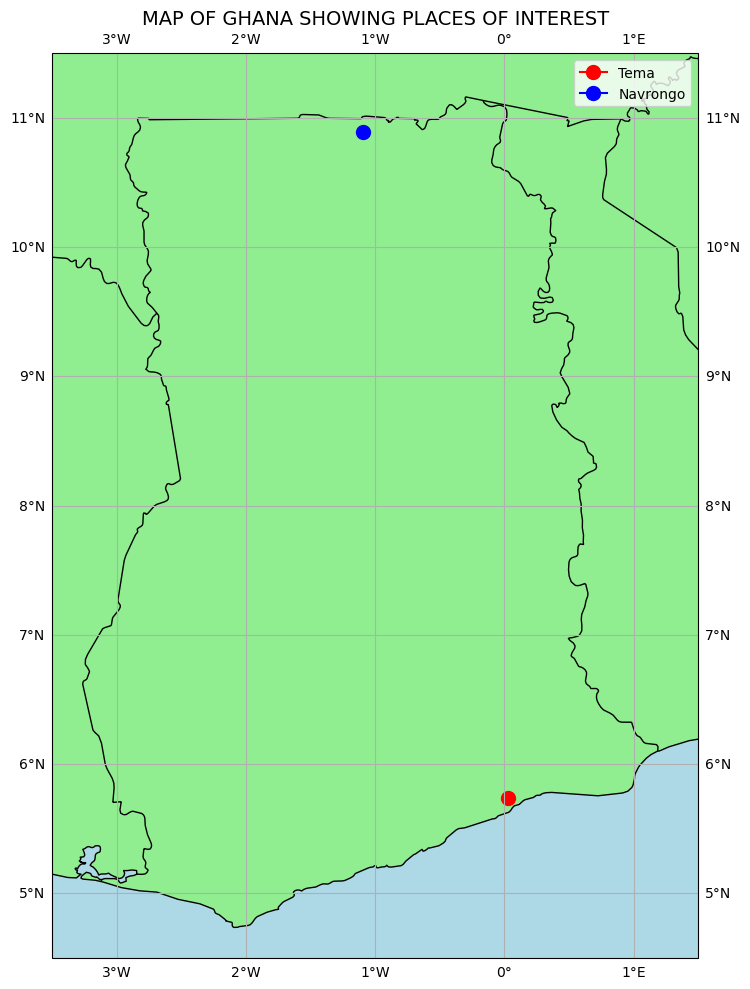

In [4]:
plt.figure(figsize=(8, 10))                                       # Create a new figure with a size of 8 inches by 10 inches
ax = plt.axes(projection=ccrs.PlateCarree())                     # Create axes with PlateCarree projection
ax.set_extent([-3.5, 1.5, 4.5, 11.5], crs=ccrs.PlateCarree())    # Set the map extent to Ghana’s bounding box



ax.add_feature(cfeature.COASTLINE)                               # Add coastline outlines to the map
ax.add_feature(cfeature.BORDERS)                                 # Add country borders to the map
ax.add_feature(cfeature.LAND, facecolor='lightgreen')            # Add land areas with a light green fill color
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')            # Add ocean areas with a light blue fill color


# Plot a red circular marker for Tema at longitude 0.02680 and latitude 5.73537
ax.plot(0.02680, 5.73537, marker='o', markersize=10, color='red', transform=ccrs.PlateCarree(), label='Tema')

# Plot a blue circular marker for Navrongo at longitude -1.09254 and latitude 10.89433
ax.plot(-1.09254, 10.89433, marker='o', markersize=10, color='blue', transform=ccrs.PlateCarree(), label='Navrongo')

# transform=ccrs.PlateCarree() ensures coordinates are interpreted as latitude/longitude in the PlateCarree projection
# label='Tema' and label='Navrongo' set legend labels for each point


ax.gridlines(draw_labels=True)                                   # Add gridlines for latitude and longitude with labels on the axes
                                                                 # draw_labels=True automatically adds latitude/longitude labels on the map’s edges


plt.title('MAP OF GHANA SHOWING PLACES OF INTEREST', fontsize=14)  # Set the map title with a font size of 14
plt.legend()                                                       # Add a legend to display labels for Tema and Navrongo markers
plt.tight_layout()                                                 # Adjust the layout to prevent clipping of labels and ensure proper spacing
plt.show()                                                         # Display the map on the screen

# Extracting Boundary Layer Height Data for Navrongo and Tema

In [5]:
# Select the nearest data point to Navrongo and Tema.
# The blh variable is an xarray DataArray hence '.values' converts it to a NumPy array containing only the blh values.
# This is to check for consistent values (No NANs)
navrongo = dataset.blh.sel(latitude=10.89433, longitude=-1.09254, method='nearest').values
tema = dataset.blh.sel(latitude=5.73537, longitude=0.02680, method='nearest').values

# Extract boundary layer height (blh) data for Navrongo and Tema as an xarray DataArray
# This retains metadata (coordinates, units) and time dimensions for further processing
navrongo1 = dataset.blh.sel(latitude=10.89433, longitude=-1.09254, method='nearest')
tema1 = dataset.blh.sel(latitude=5.73537, longitude=0.02680, method='nearest')


In [6]:
navrongo

array([  35.522873,   34.464703,   30.432253,   24.891266,   21.316763,
         30.9547  ,   53.30339 ,   78.797005,  123.53522 ,  208.12589 ,
        365.73145 ,  751.2012  , 1337.3528  , 1614.2434  , 1856.1875  ,
       1912.8713  , 1870.3293  ,  188.68147 ,   23.57555 ,   20.737492,
         19.71664 ,   19.383785,   20.981855,   15.064497], dtype=float32)

In [7]:
tema

array([ 411.3354 ,  416.6522 ,  410.86975,  408.39127,  405.31677,
        365.4547 ,  377.80338,  385.672  ,  436.66022,  588.62585,
        740.60645,  974.1387 , 1139.5403 , 1212.8059 , 1086.3125 ,
        565.12134,  684.3918 ,  659.68146,  560.07556,  411.1125 ,
        403.09164,  411.3838 ,  423.48184,  404.18948], dtype=float32)

# Time Series Plot

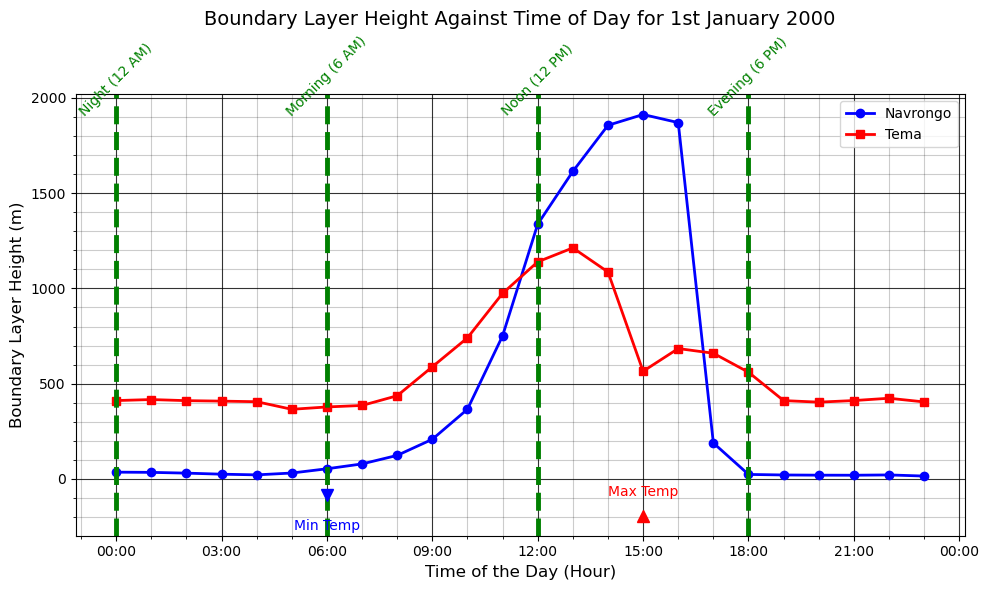

In [9]:
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10 inches wide, 6 inches in height.


navrongo1.plot(label='Navrongo', color='blue', marker='o', linewidth=2)  # Plot Navrongo data with a blue line, circular markers, and line width of 2

tema1.plot(label='Tema', color='red', marker='s', linewidth=2)  # Plot Tema data with a red line, square markers, and line width of 2


plt.title('Boundary Layer Height Against Time of Day for 1st January 2000', fontsize=14, pad=50)  # Set plot title with font size 14 and padding of 50
                                                                             # - pad=50 adds space above the title to avoid overlap with the plot

plt.xlabel('Time of the Day (Hour)', fontsize=12)  # Label x-axis with font size 12

plt.ylabel('Boundary Layer Height (m)', fontsize=12)  # Label y-axis with font size 12



ax = plt.gca()  # - plt.gca() (get current axis) retrieves the axes object created by xarray’s .plot() method for customization
                # - Allows direct manipulation of axis properties like ticks, grid, and annotations

# Format time on x-axis
ax.xaxis.set_major_locator(mdates.HourLocator(interval=3)) # - mdates.HourLocator(interval=3) places major ticks at 3-hour intervals on the xaxis
                                                           # - Matches the dataset’s 12 AM to 12 AM time range

ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1)) # - Adds minor ticks at 1-hour intervals for detailed analysis.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # - Converts x-axis tick labels to time-of-day format (hours:minutes)
                                                             # - Since the dataset spans one day, only the time part is shown, ignoring the date


ax.yaxis.set_minor_locator(AutoMinorLocator())  # Add minor ticks on the y-axis automatically
                                                # - Enhances readability of boundary layer height values without manually specifying tick locations


ax.grid(True, which='major', color='black', linestyle='-', alpha=0.8)  # Add major grid with black solid lines and 80% opacity

ax.grid(True, which='minor', color='black', linestyle='-', alpha=0.2)  # Add minor grid with black solid lines and 20% opacity

# Diurnal key times
diurnal_times = {
    'Night (12 AM)': navrongo1.valid_time.values[0],                            # 12:00 AM (start of the dataset)
    'Morning (6 AM)': navrongo1.valid_time.values[0] + np.timedelta64(6, 'h'),  # 6:00 AM
    'Noon (12 PM)': navrongo1.valid_time.values[0] + np.timedelta64(12, 'h'),   # 12:00 PM
    'Evening (6 PM)': navrongo1.valid_time.values[0] + np.timedelta64(18, 'h')  # 6:00 PM
}
# - Defines a dictionary mapping diurnal time labels to numpy.datetime64 objects
# - navrongo1.valid_time.values[0] is the first time in the dataset, 12:00 AM (2020-01-01T00:00:00)
# - np.timedelta64(X, 'h') adds X hours to the starting time (a numpy.datetime64 object)
# - Since the dataset spans 12 AM to 12 AM, these times align with the x-axis

# Add vertical lines for diurnal times
for label, time in diurnal_times.items():  # Iterate through the diurnal_times dictionary
    ax.axvline(time, color='green', linestyle='--', linewidth=3.5)  # - ax.axvline() draws a vertical line across the plot at the specified x-axis value (time)

    ax.text(time, ax.get_ylim()[1] * 0.95, label, rotation=45, fontsize=10, color='green', ha='center')  # Add a text label
    # - Places the label (e.g., 'Morning (6 AM)') at the specified time, at 95% of the y-axis height
    # - rotation=45 tilts the text for readability
    # - fontsize=10 and color='green' match the line style; ha='center' centers the text on the line

# Temperature markers
min_temp_time = navrongo1.valid_time.values[0] + np.timedelta64(6, 'h')  # Define 6:00 AM for minimum temperature

max_temp_time = navrongo1.valid_time.values[0] + np.timedelta64(15, 'h')  # Define 3:00 PM for maximum temperature


ax.plot(min_temp_time, ax.get_ylim()[0] * 1.05, 'bv', markersize=8)  # Plot blue downward triangle at min temp time
                                                                     # - Plots a marker at 6 AM, slightly above the y-axis minimum 
                                                                     # - 'bv' specifies a blue ('b') downward triangle ('v'); markersize=8 sets the size

ax.plot(max_temp_time, ax.get_ylim()[0] * 1.05, 'r^', markersize=8)  # Plot red upward triangle at max temp time
                                                                     # - Plots a marker at 3 PM, slightly above the y-axis minimum
                                                                     # - 'r^' specifies a red ('r') upward triangle ('^')

ax.text(min_temp_time, ax.get_ylim()[0] * 0.9, 'Min Temp', color='blue', ha='center')  # Adds a text label at a specific position on the plot.
                                                                                       # min_temp_time: X-axis position - 6:00 AM 
                                                         # ax.get_ylim()[0] * 0.9: Y-axis position from bottom - Starts from 90% of the minimum Y-value.
                                                         # color='blue': Makes the label blue to match the marker.
                                                         # ha='center': Horizontally aligns the text to the center of the X value (min_temp_time).

ax.text(max_temp_time, ax.get_ylim()[0] * 0.3, 'Max Temp', color='red', ha='center')  # Positions the text from 30% of the minimum Y-value


plt.legend()                             # Add a legend to identify Navrongo and Tema lines
plt.tight_layout()                       # Adjust layout to prevent clipping of labels and ensure proper spacing
plt.show()                               # Display the plot 
